# Plot timings from CESM/NorESM runs on Betzy and Oracle Cloud Infrastructure (18 nodes x 36 processors)

In [102]:
import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

## Get number of processors

In [104]:
def get_nprocs(buffer):
    answer = buffer.find('pe count for cost estimate')
    nb_processors = int(buffer[answer:].split("\n")[0].split(":")[1])
    return nb_processors

## Get Model Cost

In [105]:
def get_modelcost(buffer):
    answer = buffer.find('Model Cost')
    model_cost = float((buffer[answer:].split("\n")[0].split(":")[1]).split('pe-hrs/simulated_year')[0])
    return model_cost    

## Get Model throughput

In [106]:
def get_modelthroughput(buffer):
    answer = buffer.find('Model Throughput')
    model_throughput = float((buffer[answer:].split("\n")[0].split(":")[1]).split('simulated_years/day')[0])
    return model_throughput    

## Init time

In [107]:
def get_initime(buffer):
    answer = buffer.find('Init Time')
    model_init_time = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_init_time   

## Run Time

In [108]:
def get_runtime(buffer):
    answer = buffer.find('Run Time')
    model_runtime = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_runtime   

## Final Time

In [109]:
def get_finaltime(buffer):
    answer = buffer.find('Final Time')
    model_finaltime = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_finaltime   

## Extract timing information for one case


In [110]:
def get_timing(platform_case, esm_case, container, filename, dframe):
    print(filename)
    f = open(filename, "r")
    buffer = f.read()
    data = {'platform': platform_case,
            'case': esm_case,
            'pe-count':  get_nprocs(buffer),
            'cost': get_modelcost(buffer),
            'throughput': get_modelthroughput(buffer),
            'initime': get_initime(buffer),
            'runtime': get_runtime(buffer),
            'type': container,
            'finaltime': get_finaltime(buffer),
        }
    return dframe.append(data, ignore_index=True)

In [111]:
def get_timings_from_files(platform_case, esm_case, container, df):
    files_to_list = "noresm-timings/" + platform_case + "/cesm_timing.*"
    files = glob.glob(files_to_list)
    for file in files:
        df = get_timing(platform_case, esm_case, container, file, df)
    return df

## Create pandas dataframe to be filled with timings

In [112]:
columns = ['platform', 'case', 'pe-count', 'cost', 'throughput', 'initime', 'runtime', 'finaltime', 'type']
df = pd.DataFrame (columns = columns)

## Go through files to get timings

#### Intel NorESM container with MPICH

In [113]:
platform_case = "betzy-intel-mpich-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'singularity', df)

noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-7x128p-NF2000climo-f19_f19_mg17-185726.210524.131645
noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-4x128p-NF2000climo-f19_f19_mg17-185705.210524.131527
noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-8x128p-NF2000climo-f19_f19_mg17-185737.210524.131648
noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-1x128p-NF2000climo-f19_f19_mg17-185693.210524.235529
noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-5x128p-NF2000climo-f19_f19_mg17-185710.210524.131734
noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-8x128p-NF2000climo-f19_f19_mg17-185736.210524.131640
noresm-timings/betzy-intel-mpich-container/cesm_timing.noresm-intel-mpich-container-2x128p-NF2000climo-f19_f19_mg17-185686.210524.212737
noresm-timings/betzy-intel-mpich-containe

#### Oracle Cloud Infrastructure (18 nodes x 36 processors)

In [114]:
platform_case = "oracle-intel-mpich-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'singularity', df)

noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-6x36-intel-mpich-noresm-container-NF2000climo-f19_f19_mg17-20210525-211.210526.000207
noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-11x36-intel-mpich-noresm-container-NF2000climo-f19_f19_mg17-20210527-93.210527.201647
noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-4x36-intel-mpich-noresm-container-NF2000climo-f19_f19_mg17-20210528.210527.224606
noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-10x36-intel-mpich-noresm-container-NF2000climo-f19_f19_mg17-20210527-92.210527.195640
noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-8x36-intel-mpich-noresm-container-NF2000climo-f19_f19_mg17-20210525-213.210526.084759
noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-4x36-intel-mpich-noresm-container-NF2000climo-f19_f19_mg17-20210525-209.210525.230155
noresm-timings/oracle-intel-mpich-container/cesm_timing.beegfs-5x36-intel-mpich-noresm-container-NF2000climo-f

In [115]:
df.to_csv('timings_' + esm_case + '.csv', index=False)

## Plot timings

In [116]:
df

,platform,case,pe-count,cost,throughput,initime,runtime,finaltime,type
0,betzy-intel-mpich-container,NF2000climo-f19_f19_mg17,896,642.91,33.45,123.300,219.387,0.004,singularity
1,betzy-intel-mpich-container,NF2000climo-f19_f19_mg17,512,545.58,22.52,135.043,325.805,0.004,singularity
2,betzy-intel-mpich-container,NF2000climo-f19_f19_mg17,1024,697.78,35.22,123.672,208.347,0.006,singularity
3,betzy-intel-mpich-container,NF2000climo-f19_f19_mg17,128,465.67,6.60,121.116,1112.340,0.010,singularity
4,betzy-intel-mpich-container,NF2000climo-f19_f19_mg17,640,605.99,25.35,123.679,289.505,0.004,singularity
...,...,...,...,...,...,...,...,...,...
109,oracle-intel-mpich-container,NF2000climo-f19_f19_mg17,288,464.42,14.88,406.875,493.049,0.009,singularity
110,oracle-intel-mpich-container,NF2000climo-f19_f19_mg17,396,492.26,19.31,392.970,380.074,0.007,singularity
111,oracle-intel-mpich-container,NF2000climo-f19_f19_mg17,36,338.26,2.55,156.733,2872.895,0.013,singularity
112,oracle-intel-mpich-container,NF2000climo-f19_f19_mg17,432,468.33,22.14,415.300,331.469,0.007,singularity


In [124]:
def make_plot(df, colname, title, ylabel, legend=[], xlim=[], ylim=[]):
    fig = plt.figure(1, figsize=[15,10])
    sns.lineplot(data=df, x="pe-count", y=colname, hue="platform", style="type")
    plt.xlabel("Number of CPUs")
    plt.ylabel(ylabel)
    plt.title(title + "\n")
    if legend != []:
        plt.legend(legend)
    if xlim != []:
        plt.xlim(xlim[0],xlim[1])
    if ylim != []:
        plt.ylim(ylim[0],ylim[1])
    plt.savefig(colname + ".png")

### Plot Model cost

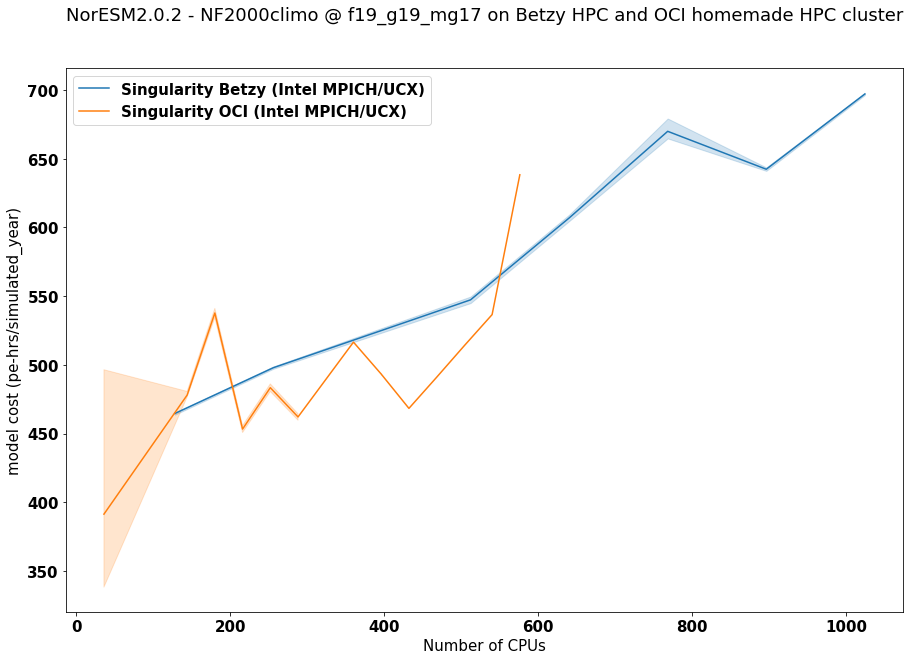

In [118]:
make_plot(df, 'cost', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC and OCI homemade HPC cluster\n", "model cost (pe-hrs/simulated_year)",
          ["Singularity Betzy (Intel MPICH/UCX)", "Singularity OCI (Intel MPICH/UCX)"])

### Model Throughput

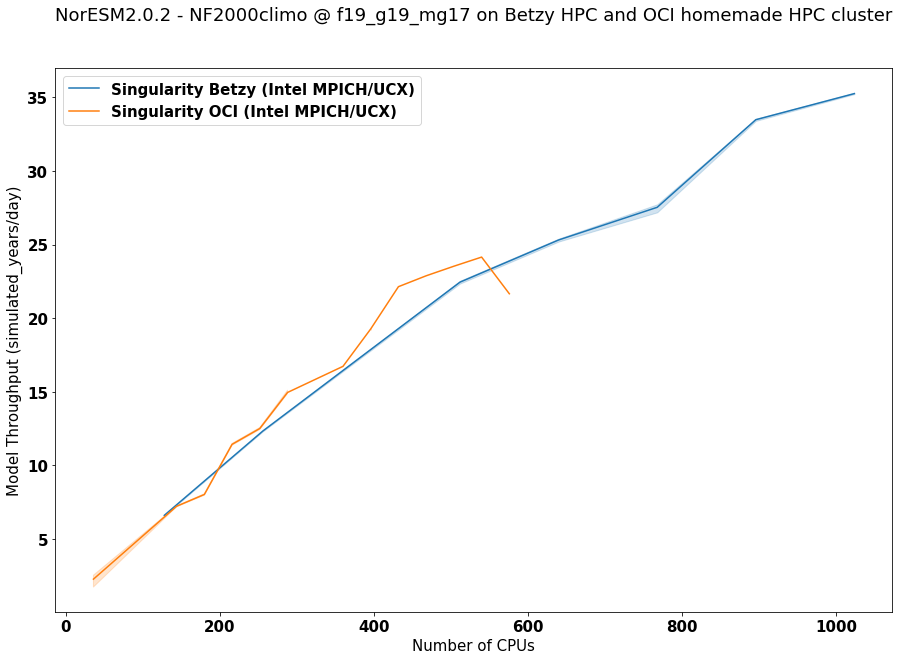

In [119]:
make_plot(df, 'throughput', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC and OCI homemade HPC cluster\n", "Model Throughput (simulated_years/day)",
         ["Singularity Betzy (Intel MPICH/UCX)", "Singularity OCI (Intel MPICH/UCX)"])

### Model Init Time

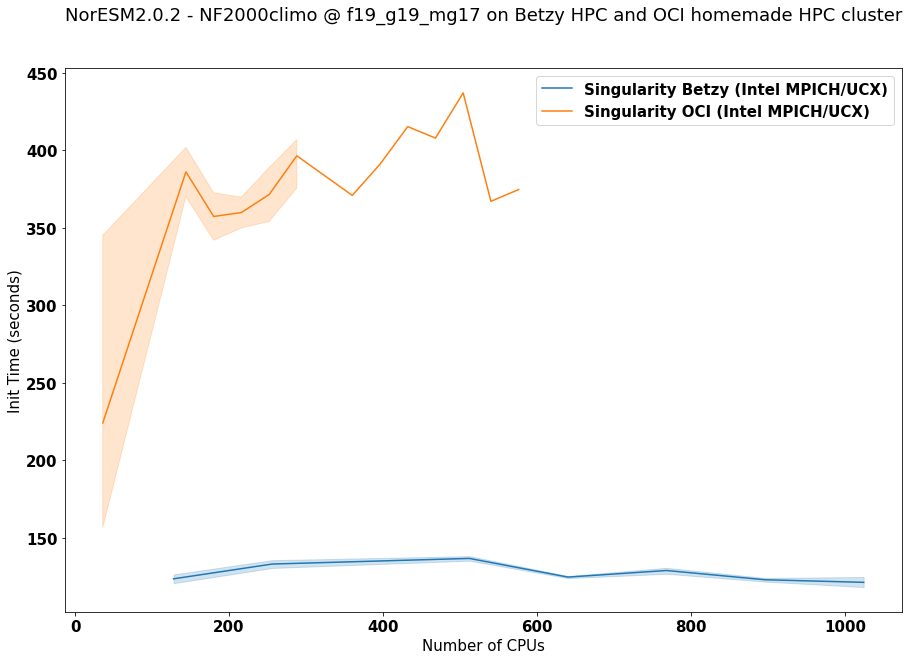

In [120]:
make_plot(df, 'initime', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC and OCI homemade HPC cluster\n", "Init Time (seconds)",
          ["Singularity Betzy (Intel MPICH/UCX)", "Singularity OCI (Intel MPICH/UCX)"])

### Model Run Time

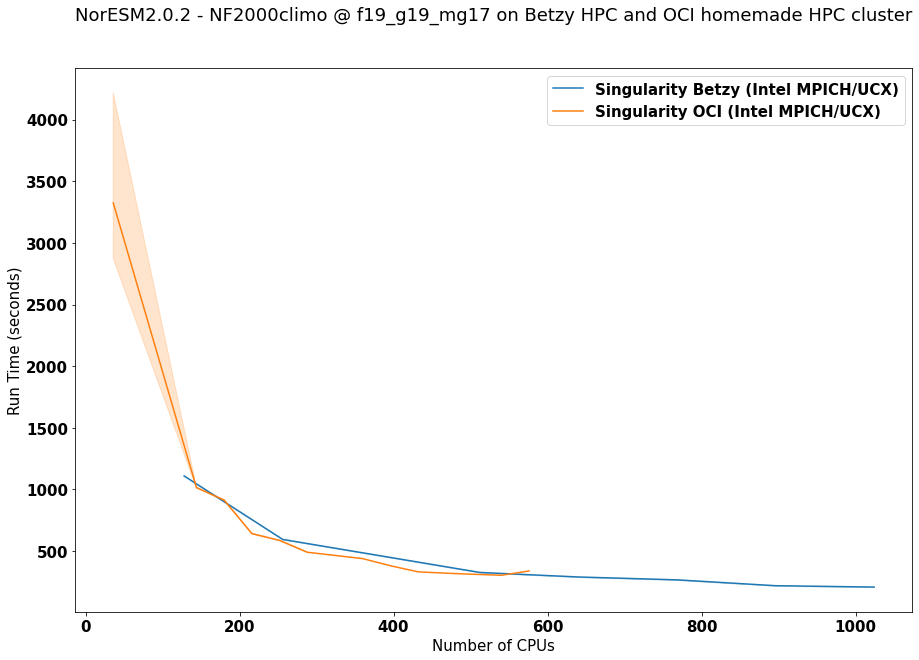

In [121]:
make_plot(df, 'runtime', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC and OCI homemade HPC cluster\n", "Run Time (seconds)",
          ["Singularity Betzy (Intel MPICH/UCX)", "Singularity OCI (Intel MPICH/UCX)"])

#### Oracle Cloud Infrastructure with ARM (VM 1x80)

In [122]:
platform_case = "arm-1x80-gnu-mpich-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'singularity', df)

noresm-timings/arm-1x80-gnu-mpich-container/cesm_timing.1x36-aarm64-noresm-gnu-mpich-container-NF2000climo-f19_f19_mg17-20210528.210528-113715
noresm-timings/arm-1x80-gnu-mpich-container/cesm_timing.1x54-aarm64-noresm-gnu-mpich-container-NF2000climo-f19_f19_mg17-20210528.210528-124517
noresm-timings/arm-1x80-gnu-mpich-container/cesm_timing.1x32-aarm64-noresm-gnu-mpich-container-NF2000climo-f19_f19_mg17-20210528.210528-141743
noresm-timings/arm-1x80-gnu-mpich-container/cesm_timing.1x64-aarm64-noresm-gnu-mpich-container-NF2000climo-f19_f19_mg17-20210528.210528-133300
noresm-timings/arm-1x80-gnu-mpich-container/cesm_timing.1x80-aarm64-noresm-gnu-mpich-container-NF2000climo-f19_f19_mg17-20210525.999999-999999


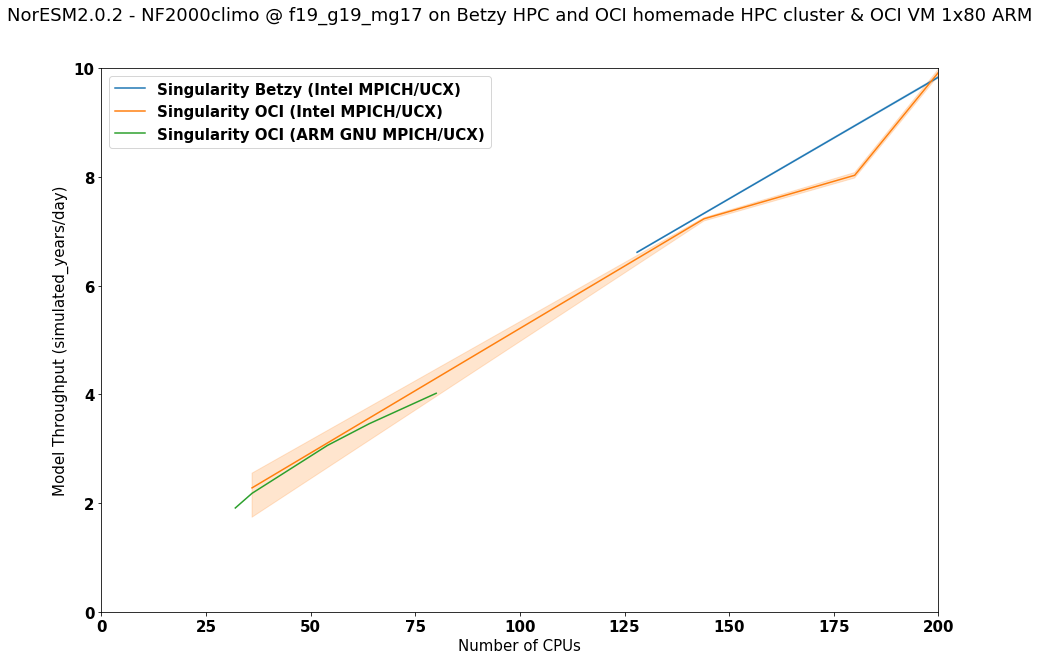

In [128]:
make_plot(df, 'throughput', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC and OCI homemade HPC cluster & OCI VM 1x80 ARM\n", "Model Throughput (simulated_years/day)",
         ["Singularity Betzy (Intel MPICH/UCX)", "Singularity OCI (Intel MPICH/UCX)", "Singularity OCI (ARM GNU MPICH/UCX)"],
         xlim=[0,200],ylim=[0,10])